In [1]:
import os
os.environ["TRANSFORMERS_NO_PYTORCH"] = "1"

In [2]:
pip install kagglehub

In [3]:
import kagglehub

path = kagglehub.model_download("google/arbitrary-image-stylization-v1/tensorFlow1/256")

print("Path to model files:", path)

Path to model files: C:\Users\pooja\.cache\kagglehub\models\google\arbitrary-image-stylization-v1\tensorFlow1\256\2


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
pip install --upgrade tensorflow tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Step 1: Load the Pre-Trained Style Transfer Model from TensorFlow Hub
def load_model():
    return hub.load(path)

In [7]:
# Step 2: Preprocess the Input Image
def preprocess_image(image_path, image_size=256):
    image = Image.open(image_path).convert("RGB")  # Open and ensure RGB format
    image = image.resize((image_size, image_size))  # Resize image
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    return tf.constant(image, dtype=tf.float32)

In [8]:
# Step 3: Apply Style Transfer
def apply_style_transfer(model, content_image, style_image):
    content_image = tf.expand_dims(content_image, axis=0)  # Add batch dimension
    style_image = tf.expand_dims(style_image, axis=0)  # Add batch dimension
    stylized_image = model(content_image, style_image)  # Run style transfer
    return tf.squeeze(stylized_image[0])  # Remove batch dimension

In [9]:
# Step 4: Save the Stylized Image
def save_image(image_tensor, output_path):
    image = (image_tensor * 255).numpy().astype(np.uint8)  # Convert to uint8
    Image.fromarray(image).save(output_path)

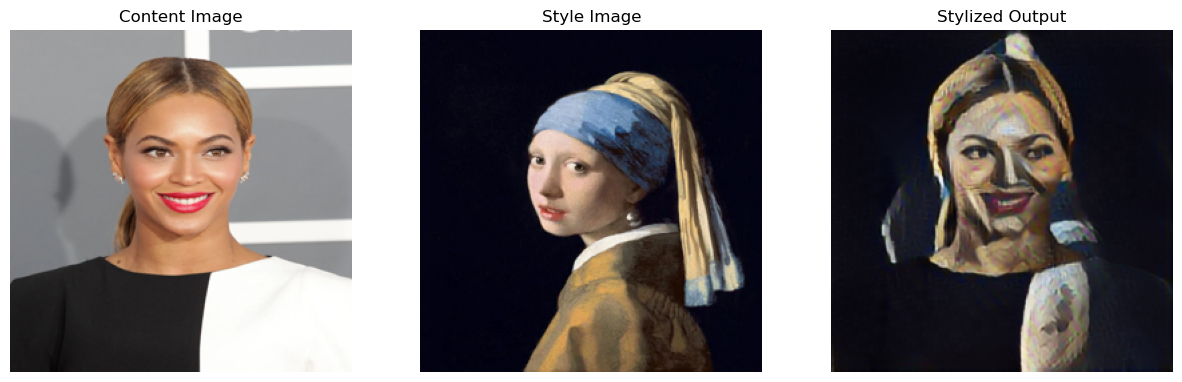

In [10]:
# Step 5: Main Script
if __name__ == "__main__":
    # File paths
    content_image_path = "D:\Pictures\image.jpeg"  # Path to your content image
    style_image_path = "D:\Pictures\Style.jpg" # Path to your style image
    output_image_path = "D:\Pictures\output.jpg" # Path to save the stylized image

    # Load pre-trained model
    model = load_model()

    # Preprocess content and style images
    content_image = preprocess_image(content_image_path)
    style_image = preprocess_image(style_image_path)

    # Perform style transfer
    stylized_image = apply_style_transfer(model, content_image, style_image)

    # Save and display the output image
    save_image(stylized_image, output_image_path)

    # Display the input and output images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Content Image")
    plt.imshow(content_image)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Style Image")
    plt.imshow(style_image)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Stylized Output")
    plt.imshow(stylized_image)
    plt.axis("off")

    plt.show()